In [45]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [46]:
import numpy as np
import h5py
#from chainconsumer import ChainConsumer
from corner import corner

In [47]:
fname = '/scratch/users/swmclau2/PearceMCMC/HOD_xi_gg_rmin_None_CorrAB_v2.hdf5'

In [48]:
f = h5py.File(fname, 'r')

In [49]:
f.attrs.keys()

[u'emu_type',
 u'training_file',
 u'fixed_params',
 u'emu_hps',
 u'sim',
 u'obs',
 u'cov',
 u'nwalkers',
 u'nsteps',
 u'nburn',
 u'seed',
 u'chain_fixed_params',
 u'param_names']

In [50]:
from ast import literal_eval

In [51]:
from pearce.emulator import NashvilleHot
tf = f.attrs['training_file']
fixed_params = literal_eval(f.attrs['fixed_params'])
emu_hps = literal_eval(f.attrs['emu_hps'])

In [52]:
emu = NashvilleHot(tf, fixed_params = fixed_params, hyperparams = emu_hps)

 /home/users/swmclau2/.local/lib/python2.7/site-packages/pearce/emulator/emu.py:2100: UserWarning:WARNING: NaN detected. Skipped 76 points in training data.


In [53]:
chain_pnames = f.attrs['param_names']

In [54]:
n_walkers = f.attrs['nwalkers']

In [55]:
sim_info = literal_eval(f.attrs['sim'])

In [56]:
chain = f['chain'][n_walkers*1000:n_walkers*6000]

In [57]:
n_params = chain.shape[1] if len(chain.shape) > 1 else 1

In [58]:
n_burn = 0
chain = chain[n_walkers*n_burn:]#, :]

In [59]:
chain = chain[np.all(chain!=0.0, axis = 1), :]

In [60]:
print chain.shape, chain.shape[0]/n_walkers

(2500000, 13) 5000


In [61]:
MAP = chain.mean(axis = 0)
print MAP

[  2.21772362e-02   1.16819099e-01  -9.70233023e-01   9.75973487e-01
   3.04383492e+00   6.86265182e+01   3.44290972e+00   7.16387015e-03
   1.52386893e-02   1.41952610e+01   1.31586695e+01   2.82392353e-01
   1.00876451e+00]


In [62]:
MAP_dict = dict(zip(emu.get_param_names(), MAP))

In [63]:
MAP_dict

{'H0': 68.626518,
 'Neff': 3.4429097,
 'alpha': 1.0087645,
 'ln10As': 3.0438349,
 'logM0': 13.158669,
 'logM1': 14.195261,
 'mean_occupation_centrals_assembias_corr1': 0.0071638701,
 'mean_occupation_satellites_assembias_corr1': 0.015238689,
 'ns': 0.97597349,
 'ombh2': 0.022177236,
 'omch2': 0.1168191,
 'sigma_logM': 0.28239235,
 'w0': -0.97023302}

In [64]:
MAP_pred = emu.emulate_wrt_r(MAP_dict)[0]

In [65]:
param_names = [r'$\Omega_b h^2$', r'$\Omega_c h^2$', r'$w_0$', r'$n_s$', r'$\ln(10A_s)$', r'$H_0$', r'$N_{eff}$',\
               r'$\log(M_0)$', r'$\sigma_{\log M }$',r'$\log(M_1)$',r'$\alpha$']
               # r'$\rho_{sat}$',r'$\rho_{cen}$', r'$\log(M_1)$',r'$\log(M_0)$', r'$\sigma_{\log M }$',r'$\alpha$' ]

In [66]:
hod_param_names = [r'$\log(M_0)$',r'$\sigma_{\log M }$',r'$\log(M_1)$' ,r'$\alpha$' ]
cosmo_param_names = [r'$\Omega_b h^2$', r'$\Omega_c h^2$', r'$w_0$', r'$n_s$', r'$\ln(10A_s)$', r'$H_0$', r'$N_{eff}$' ]

In [67]:
hod_idxs = np.array(range(len(cosmo_param_names), len(cosmo_param_names)+len(hod_param_names)))
cosmo_idxs = np.array(range(len(cosmo_param_names)))

In [68]:
if chain.shape[1] == 7:
    cosmo_chain = chain
else:
    hod_chain = chain[:,-4:]#[:, hod_idxs]
    cosmo_chain = chain[:,:-4]#[:, cosmo_idxs]

In [69]:
from pearce.mocks import cat_dict
cosmo_params = {'simname': sim_info['simname'], 
                #'boxno': sim_info['sim_hps']['boxno'],\
                #'realization': sim_info['sim_hps']['realization'], 
                'scale_factors':[sim_info['scale_factor']],\
                'system': sim_info['sim_hps']['system']}


In [70]:
cosmo_params

{'scale_factors': [1.0], 'simname': 'testbox', 'system': 'sherlock'}

In [71]:
#cosmo_params['boxno'] = 0
#cosmo_params['realization'] = 4

In [72]:
#cosmo_true_vals = [3.7,70.7317,-1.13151,0.12283, 3.11395,  0.953515,  0.021762]
#cosmo_true_vals = [cat_val_dict[pn] for pn in chain_pnames if pn in cat_val_dict]
cosmo_true_vals = [0.046*0.7**2, (0.27-0.046)*0.7**2, -1, 0.95, 3.5698, 70, 3.04] 

#cosmo_true_vals = [MAP[idx] for idx, pn in enumerate(chain_pnames) if pn in cat_val_dict]

In [73]:
import yaml
with open('/home/users/swmclau2/Git/pearce/bin/mcmc/nh_gg_mcmc_config.yaml') as yamlfile:
    cfg = yaml.load(yamlfile)
    sim_cfg = cfg['data']['sim']
    obs_cfg = cfg['data']['obs']

In [74]:
r_bins = obs_cfg['rbins']

In [75]:
true_data = f['data'].value

In [76]:
true_data

array([  1.18458853e+04,   6.04948097e+03,   3.23783861e+03,
         1.63879940e+03,   8.33194393e+02,   4.05327117e+02,
         1.91148913e+02,   9.47501628e+01,   4.51422826e+01,
         2.13405085e+01,   1.06392629e+01,   5.81375900e+00,
         3.30139984e+00,   1.92967121e+00,   1.09896199e+00,
         6.05205029e-01,   3.18360823e-01,   1.57647327e-01])

In [77]:
rbc = emu.scale_bin_centers#[-len(emu.scale_bin_centers):]

In [78]:
cov = f['cov'].value
yerr = np.sqrt(np.diag(cov))[-len(emu.scale_bin_centers):]

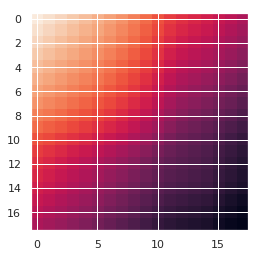

In [81]:
plt.imshow(np.log10(cov) )

In [35]:
bounds = {pname: emu.get_param_bounds(pname) for pname in emu.get_param_names()[:-4]}

In [36]:
bounds

{'H0': (61.694719999999997, 74.76751999999999),
 'Neff': (2.6212499999999999, 4.2787499999999996),
 'ln10As': (3.0009000000000001, 3.179424),
 'mean_occupation_centrals_assembias_corr1': (-1.0, 1.0),
 'mean_occupation_satellites_assembias_corr1': (-1.0, 1.0),
 'ns': (0.92784619999999995, 0.99744959999999994),
 'ombh2': (0.02066455, 0.02371239),
 'omch2': (0.10121810000000001, 0.13177679999999997),
 'w0': (-1.399921, -0.56584860000000003)}

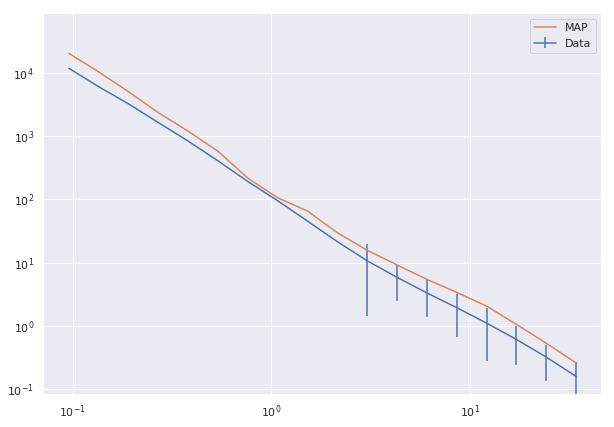

In [37]:
fig = plt.figure(figsize = (10,7))
plt.errorbar(rbc, true_data[-len(emu.scale_bin_centers):], yerr=yerr, label = 'Data')
#plt.plot(rbc, 10**true_pred, label = 'True')
plt.plot(rbc, 10**MAP_pred, label = 'MAP')
#plt.plot(rbc, 10**pop_xi.mean(axis = 0), label = 'Pop')#, lw = 5)

plt.loglog()
plt.legend(loc='best')
plt.show();

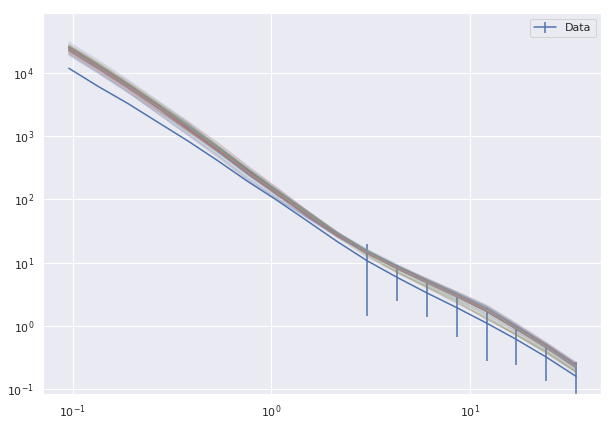

In [38]:
fig = plt.figure(figsize = (10,7))
chain_samples = np.random.choice(chain.shape[0], size = 100, replace = False)
for sample in chain[chain_samples]:
    param_dict = dict(zip(emu.get_param_names(), sample))
    plt.plot(rbc, 10**emu.emulate_wrt_r(param_dict)[0], alpha = 0.2)
plt.errorbar(rbc, true_data[-len(emu.scale_bin_centers):], yerr=yerr, label = 'Data')
#plt.plot(rbc, 10**true_pred, label = 'True')
#plt.plot(rbc, 10**MAP_pred, label = 'MAP')
#plt.plot(rbc, 10**pop_xi.mean(axis = 0), label = 'Pop')#, lw = 5)

plt.loglog()
plt.legend(loc='best')
plt.show();

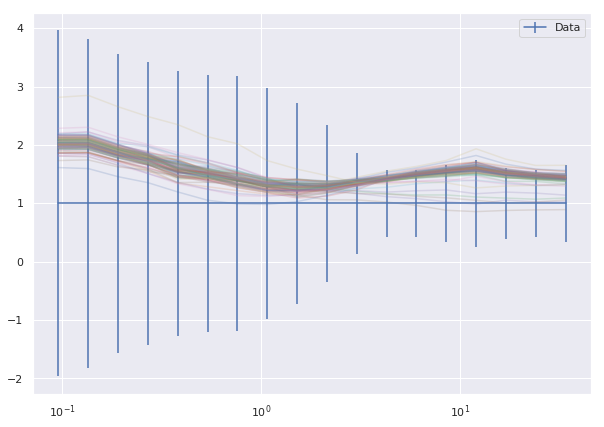

In [39]:
fig = plt.figure(figsize = (10,7))
chain_samples = np.random.choice(chain.shape[0], size = 100, replace = False)
for sample in chain[chain_samples]:
    param_dict = dict(zip(emu.get_param_names(), sample))
    plt.plot(rbc, 10**emu.emulate_wrt_r(param_dict)[0]/true_data[-len(emu.scale_bin_centers):], alpha = 0.2)
plt.errorbar(rbc, np.ones(len(emu.scale_bin_centers)), yerr=yerr/true_data[-len(emu.scale_bin_centers):], label = 'Data')
#plt.plot(rbc, 10**true_pred, label = 'True')
#plt.plot(rbc, 10**MAP_pred, label = 'MAP')
#plt.plot(rbc, 10**pop_xi.mean(axis = 0), label = 'Pop')#, lw = 5)
plt.xscale('log')
#plt.loglog()
plt.legend(loc='best')
plt.show();

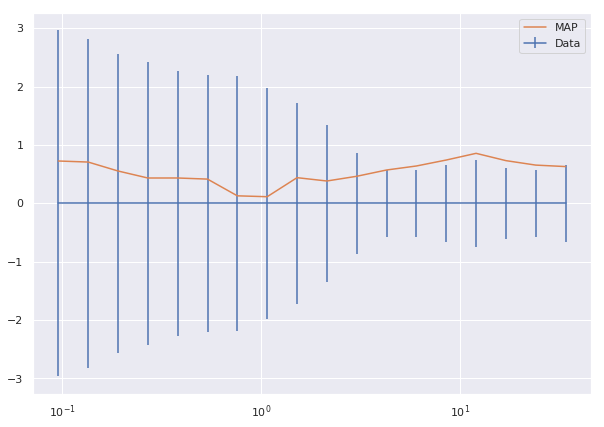

In [40]:
fig = plt.figure(figsize = (10,7))
plt.errorbar(rbc, np.zeros_like(true_data[-len(emu.scale_bin_centers):]), yerr=yerr/true_data[-len(emu.scale_bin_centers):], label = 'Data')
#plt.plot(rbc, (10**true_pred-true_data[-len(emu.scale_bin_centers):])/true_data[-len(emu.scale_bin_centers):], label = 'True')
plt.plot(rbc, (10**MAP_pred-true_data[-len(emu.scale_bin_centers):])/true_data[-len(emu.scale_bin_centers):], label = 'MAP')
plt.xscale('log')
plt.legend(loc='best')
plt.show();

In [41]:
emu.get_param_names()

['ombh2',
 'omch2',
 'w0',
 'ns',
 'ln10As',
 'H0',
 'Neff',
 'mean_occupation_centrals_assembias_corr1',
 'mean_occupation_satellites_assembias_corr1',
 'logM1',
 'logM0',
 'sigma_logM',
 'alpha']

In [42]:
true_param_dict = param_dict.copy()

In [43]:
N = 30
cmap = sns.color_palette("BrBG_d", N)

In [44]:
fig = plt.figure(figsize=(10,7))
varied_pname = 'mean_occupation_centrals_assembias_param1'
lower, upper = emu.get_param_bounds(varied_pname)
for c, val in zip(cmap, np.linspace(lower, upper, N) ):
    param_dict = true_param_dict.copy()
    param_dict[varied_pname] = val
    pred = emu.emulate_wrt_r(param_dict)[0]
    plt.plot(rbc, 10**pred, alpha = 0.5,label = val, color =c)
    
plt.errorbar(rbc, true_data[-len(emu.scale_bin_centers):], yerr=yerr, label = 'Data')
plt.loglog()
plt.legend(loc='best')
plt.show();

KeyError: 'Parameter mean_occupation_centrals_assembias_param1 could not be found.'

In [ ]:
fig = plt.figure(figsize=(10,7))
#varied_pname = 'Neff'
#lower, upper = emu.get_param_bounds(varied_pname)
i = 0
for c, val in zip(cmap, np.linspace(lower, upper, N) ):
    print i, val
    i+=1
    param_dict = true_param_dict.copy()
    param_dict[varied_pname] = val
    pred = emu.emulate_wrt_r(param_dict)[0]
    plt.plot(rbc, (10**pred-true_data[-len(emu.scale_bin_centers):])/true_data[-len(emu.scale_bin_centers):], alpha = 0.5,label = val, color =c)
    
plt.errorbar(rbc, np.zeros_like(true_data[-len(emu.scale_bin_centers):]), yerr=yerr/true_data[-len(emu.scale_bin_centers):], label = 'Data')
#plt.loglog()
plt.xscale('log')
#plt.legend(loc='best')
plt.show();

In [ ]:
bin = 17
#emu._kernels[bin][0].linear.variances

In [ ]:
emu._kernels[bin][0].rbf.lengthscale

In [ ]:
x = emu._x1_std*emu.x1+emu._x1_mean

In [ ]:
emu.get_param_names()

In [ ]:
np.argmin(abs(x[:,1]- 0.11386))

In [ ]:
plt.plot(emu.scale_bin_centers, emu.y[:, 4, 100]+emu._y_mean)
plt.xscale('log')

In [ ]:
param_dict = dict(zip(emu.get_param_names(), np.hstack([emu.x1[4]*emu._x1_std+emu._x1_mean,\
                                                        emu.x2[100]*emu._x2_std+emu._x2_mean])))

In [ ]:
param_dict

In [ ]:
data = emu.y[:, 0, 0]+emu._y_mean
#plt.plot(emu.scale_bin_centers, )
plt.plot(emu.scale_bin_centers, emu.emulate_wrt_r(param_dict)[0]/data)
plt.xscale('log')